In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = '/Users/hutiancheng/Desktop/dataset.csv'
data = pd.read_csv(dataset_path)

#First few rows of the dataframe
print(df.head())

#Summary of the data
print(df.describe())

#Checking for missing values
print(df.isnull().sum())



                       from_totally_fake_account  monopoly_money_amount  \
not_happened_yet_date                                                     
2025-01-01                                 10371                   4.00   
2025-01-01                                 88339                   2.40   
2025-01-01                                 18555                   2.40   
2025-01-01                                 18555                   4.10   
2025-01-01                                 80792                   1.95   

                      to_randomly_generated_account     transaction_category  \
not_happened_yet_date                                                          
2025-01-01                                   CINEMA       Small Transactions   
2025-01-01                                    40544  Very Small Transactions   
2025-01-01                                    85149  Very Small Transactions   
2025-01-01                      HIPSTER_COFFEE_SHOP       Small Transactio

In [3]:
#Calculating first quartile (Q1) and third quartile (Q3)
Q1 = df['monopoly_money_amount'].quantile(0.25)
Q3 = df['monopoly_money_amount'].quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1

#Data points that are potential outliers
outliers = df[(df['monopoly_money_amount'] < (Q1 - 1.5 * IQR)) | (df['monopoly_money_amount'] > (Q3 + 1.5 * IQR))]['monopoly_money_amount']
print(outliers)
len(outliers)  

25          84.00
61         180.00
126        163.00
130        130.00
146         37.55
            ...  
1048528     53.88
1048534     58.00
1048564     58.98
1048570     44.69
1048574    187.00
Name: monopoly_money_amount, Length: 102643, dtype: float64


102643

In [4]:
#Feature Scaling
#Calculate percentiles
percentiles = df['monopoly_money_amount'].quantile([0.2, 0.4, 0.6, 0.8, 0.95])

#Defining the boundaries for the categories
P1 = percentiles.iloc[0]  # 20th percentile
P2 = percentiles.iloc[1]  # 40th percentile
P3= percentiles.iloc[2]  # 60th percentile
P4 = percentiles.iloc[3]  # 80th percentile
P5 = percentiles.iloc[4]  # 95th percentile

#Categorizing transactions based on the amount
def categorize_amount(amount):
    if amount <= P1:
        return "Very Small Transactions"
    elif amount <= P2:
        return "Small Transactions"
    elif amount <= P3:
        return "Moderate Transactions"
    elif amount <= P4:
        return "Large Transactions"
    elif amount <= P5:
        return "Very Large Transactions"
    else:
        return "Extreme Transactions"

#Creating a new column for the transaction category
df['transaction_category'] = df['monopoly_money_amount'].apply(categorize_amount)

#Updated DataFrame 
print(df)



         from_totally_fake_account  monopoly_money_amount  \
0                            10371                   4.00   
1                            88339                   2.40   
2                            18555                   2.40   
3                            18555                   4.10   
4                            80792                   1.95   
...                            ...                    ...   
1048570                       9869                  44.69   
1048571                       9869                   2.25   
1048572                       9869                   2.40   
1048573                       9869                   2.25   
1048574                      37671                 187.00   

        to_randomly_generated_account not_happened_yet_date  \
0                              CINEMA            01/01/2025   
1                               40544            01/01/2025   
2                               85149            01/01/2025   
3              

In [5]:
df

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_category
0,10371,4.00,CINEMA,01/01/2025,Small Transactions
1,88339,2.40,40544,01/01/2025,Very Small Transactions
2,18555,2.40,85149,01/01/2025,Very Small Transactions
3,18555,4.10,HIPSTER_COFFEE_SHOP,01/01/2025,Small Transactions
4,80792,1.95,18555,01/01/2025,Very Small Transactions
...,...,...,...,...,...
1048570,9869,44.69,TAKEAWAY,07/02/2025,Very Large Transactions
1048571,9869,2.25,TOTALLY_A_REAL_COFFEE_SHOP,07/02/2025,Very Small Transactions
1048572,9869,2.40,A_CAFE,07/02/2025,Very Small Transactions
1048573,9869,2.25,A_LOCAL_COFFEE_SHOP,07/02/2025,Very Small Transactions


In [6]:
#Count of number of categorized transactions 
very_small_count = df[df['transaction_category'] == 'Very Small Transactions'].shape[0]
small_count = df[df['transaction_category'] == 'Small Transactions'].shape[0]
moderate_count = df[df['transaction_category'] == 'Moderate Transactions'].shape[0]
large_count = df[df['transaction_category'] == 'Large Transactions'].shape[0]
very_large_count = df[df['transaction_category'] == 'Very Large Transactions'].shape[0]
extreme_count = df[df['transaction_category'] == 'Extreme Transactions'].shape[0]

print("Number of transactions categorized as 'Very Small':", very_small_count)
print("Number of transactions categorized as 'Small':", small_count)
print("Number of transactions categorized as 'Moderate':", moderate_count)
print("Number of transactions categorized as 'Large':", large_count)
print("Number of transactions categorized as 'Very Large':", very_large_count)
print("Number of transactions categorized as 'Extreme':", extreme_count)


Number of transactions categorized as 'Very Small': 216314
Number of transactions categorized as 'Small': 235388
Number of transactions categorized as 'Moderate': 213845
Number of transactions categorized as 'Large': 173345
Number of transactions categorized as 'Very Large': 157443
Number of transactions categorized as 'Extreme': 52240


In [7]:
#Defining keywords related to cafes or coffee
cafe_keywords = ['coffee', 'cafe']  

#Filtering transactions containing keywords related to cafes or coffee
cafe_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(cafe_keywords), case=False, na=False)]

#Counting the number of cafe transactions
cafe_transactions_count = len(cafe_transactions)

#Filtering out transactions from the original dataframe based on cafe_transactions
non_cafe_transactions = df[~df.index.isin(cafe_transactions.index)]

#Non-cafe transactions
print("Non-Cafe Transactions:")
print(non_cafe_transactions)

#Extracting unique accounts associated with non-cafe transactions
accounts_non_cafe = non_cafe_transactions['to_randomly_generated_account'].unique()

#Count of non-cafe transactions
print("\nNumber of transactions not related to cafes or coffee:", len(non_cafe_transactions))

#Accounts with transactions not related to cafes or coffee
print("\nAccounts with transactions not related to cafes or coffee:")
print(accounts_non_cafe)

#Cafe transactions
print("Cafe Transactions:")
print(cafe_transactions) #Insight1: There are 2710537 transactions related to coffee spends

#Grouping transactions by the name of the coffee shop and count the occurrences
coffee_shop_frequency = cafe_transactions['to_randomly_generated_account'].value_counts()

#Frequency of transactions in each coffee shop
print("Frequency of Transactions in Each Coffee Shop:")
print(coffee_shop_frequency)


Non-Cafe Transactions:
         from_totally_fake_account  monopoly_money_amount  \
0                            10371                   4.00   
1                            88339                   2.40   
2                            18555                   2.40   
4                            80792                   1.95   
12                           77222                   4.50   
...                            ...                    ...   
1048567                      29340                   9.00   
1048568                      29340                   5.50   
1048569                      78904                  12.00   
1048570                       9869                  44.69   
1048574                      37671                 187.00   

        to_randomly_generated_account not_happened_yet_date  \
0                              CINEMA            01/01/2025   
1                               40544            01/01/2025   
2                               85149            01/01/

In [8]:
#Defining keywords related to bars, pubs, or drinks
bar_pub_keywords = ['bar', 'pub', 'drinks', 'liquor'] 

#Filtering transactions containing keywords related to bars, pubs, or drinks
bar_pub_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(bar_pub_keywords), case=False, na=False)]

#bar/pub transactions
print("Bar/Pub Transactions:")
print(bar_pub_transactions) #Insight2: There are 2165313 transactions corresponding to Pub spends


#Grouping transactions by the name of the bar or pub and count the occurrences
bar_pub_frequency = bar_pub_transactions['to_randomly_generated_account'].value_counts()

#Frequency of transactions in each bar or pub
print("Frequency of Transactions in Each Bar/Pub:")
print(bar_pub_frequency)

Bar/Pub Transactions:
         from_totally_fake_account  monopoly_money_amount  \
34                           82454                  12.00   
49                           60261                  13.00   
68                           77763                  10.50   
90                           71642                  10.00   
105                          92552                   5.00   
...                            ...                    ...   
1048559                      72614                  12.50   
1048563                      37671                   5.00   
1048564                      72470                  58.98   
1048565                      72470                   6.00   
1048569                      78904                  12.00   

        to_randomly_generated_account not_happened_yet_date  \
34                                BAR            01/01/2025   
49                                PUB            01/01/2025   
68                                PUB            01/01/2

In [9]:
#Defining keywords related to toys or video games
Shopping_keywords = ['department store', 'electronics', 'fashion', 'store', 'trainer', 'clothes', 
                            'tech', 'DVD', 'children', 'toy', 'videogame', 'board', 'action', 'DIY', 'cook', 'jewellery',
                            'accessory', 'clothing', 'sport', 'running', 'kids']


#Filtering transactions containing keywords related to toys or video games
Shopping_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(Shopping_keywords), case=False, na=False)]

#Shopping transactions
print("Shopping Transactions:")
print(Shopping_transactions) #Insight3: There are 25607 transactions corresponding to Toy spends

#Grouping transactions by the account details and count the occurrences
Shopping_frequency = Shopping_transactions['to_randomly_generated_account'].value_counts()

#Frequency of transactions related to toys or video games
print("Frequency of Transactions Related to Shopping:")
print(Shopping_frequency)

Shopping Transactions:
         from_totally_fake_account  monopoly_money_amount  \
25                           23972                   84.0   
61                           34142                  180.0   
126                           9323                  163.0   
130                           5347                  130.0   
180                          82519                  199.0   
...                            ...                    ...   
1048282                      84803                   79.0   
1048289                      64691                    8.0   
1048392                      71696                   89.0   
1048500                      77120                   77.0   
1048574                      37671                  187.0   

        to_randomly_generated_account not_happened_yet_date  \
25                           TOY_SHOP            01/01/2025   
61                   DEPARTMENT_STORE            01/01/2025   
126                  DEPARTMENT_STORE            01/01/

In [10]:
#Defining keywords related to restaurants, takeaways, Chinese cuisine, or hotels
restaurant_keywords = ['restaurant', 'take away', 'chinese', 'steak', 'sandwich', 'hotel','kebab','lunch','curry']  

#Filtering transactions containing keywords related to restaurants, takeaways, Chinese cuisine, or hotels
restaurant_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(restaurant_keywords), case=False, na=False)]

#restaurant transactions
print("Restaurant Transactions:")
#Insight4: There are 449032 transactions corresponding to Restaurant spends

#Grouping transactions by the account details and count the occurrences
restaurant_frequency = restaurant_transactions['to_randomly_generated_account'].value_counts()

#Frequency of transactions related to restaurants
print("Frequency of Transactions Related to Restaurants:")
print(restaurant_frequency)

Restaurant Transactions:
Frequency of Transactions Related to Restaurants:
LOCAL_RESTAURANT      17747
KEBAB_SHOP            11792
LUNCH_PLACE           11657
LUNCH_VAN             11552
SANDWICH_SHOP         11517
RESTAURANT             7126
CHINESE_TAKEAWAY       6316
TAKEAWAY_CURRY         6309
RESTAURANT_VOUCHER      810
STEAK_HOUSE             752
INDIAN_RESTAURANT       749
CHINESE_RESTAURANT      725
Name: to_randomly_generated_account, dtype: int64


In [11]:
#Defining categories and their corresponding keywords
categories = {
    'Cafe': ['coffee', 'cafe', 'espresso', 'bakery'],
    'Pub': ['pub', 'bar', 'drinks', 'beer', 'cocktail'],
    'Shopping': ['department store', 'electronics', 'fashion', 'store', 'trainer', 'clothes', 'tech', 'DVD', 'children', 'toy', 'videogame', 'board', 'action', 'DIY', 'cook', 'jewellery', 'accessory', 'clothing'],
    'Bookshop': ['comic', 'book', 'nerdy', 'bookshop'],
    'Cinema': ['cinema'],
    'Restaurant': ['restaurant', 'kebab', 'lunch', 'curry', 'takeaway'],
    'Supermarket': ['supermarket', 'butchers', 'greengrocer']
}

#Initializing dictionaries to store most and least expensive transactions for each category
most_expensive_transactions = {}
least_expensive_transactions = {}

#Iterating through each category and find the most and least expensive transactions
for category, keywords in categories.items():
    category_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(keywords), case=False, na=False)]
    most_expensive_transactions[category] = category_transactions.loc[category_transactions['monopoly_money_amount'].idxmax()]
    least_expensive_transactions[category] = category_transactions.loc[category_transactions['monopoly_money_amount'].idxmin()]

#Most expensive and least expensive transactions for each category
for category in categories.keys():
    print(f"\nMost Expensive Transaction in {category} Transactions:")
    print(most_expensive_transactions[category])
    print(f"\nLeast Expensive Transaction in {category} Transactions:")
    print(least_expensive_transactions[category])


Most Expensive Transaction in Cafe Transactions:
from_totally_fake_account                        35034
monopoly_money_amount                              6.0
to_randomly_generated_account                     CAFE
not_happened_yet_date                       01/01/2025
transaction_category             Moderate Transactions
Name: 284, dtype: object

Least Expensive Transaction in Cafe Transactions:
from_totally_fake_account                          18555
monopoly_money_amount                               1.45
to_randomly_generated_account                COFFEE_SHOP
not_happened_yet_date                         01/01/2025
transaction_category             Very Small Transactions
Name: 6, dtype: object

Most Expensive Transaction in Pub Transactions:
from_totally_fake_account                       83210
monopoly_money_amount                            60.0
to_randomly_generated_account               LOCAL_PUB
not_happened_yet_date                      01/01/2025
transaction_category      

In [12]:
df

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_category
0,10371,4.00,CINEMA,01/01/2025,Small Transactions
1,88339,2.40,40544,01/01/2025,Very Small Transactions
2,18555,2.40,85149,01/01/2025,Very Small Transactions
3,18555,4.10,HIPSTER_COFFEE_SHOP,01/01/2025,Small Transactions
4,80792,1.95,18555,01/01/2025,Very Small Transactions
...,...,...,...,...,...
1048570,9869,44.69,TAKEAWAY,07/02/2025,Very Large Transactions
1048571,9869,2.25,TOTALLY_A_REAL_COFFEE_SHOP,07/02/2025,Very Small Transactions
1048572,9869,2.40,A_CAFE,07/02/2025,Very Small Transactions
1048573,9869,2.25,A_LOCAL_COFFEE_SHOP,07/02/2025,Very Small Transactions


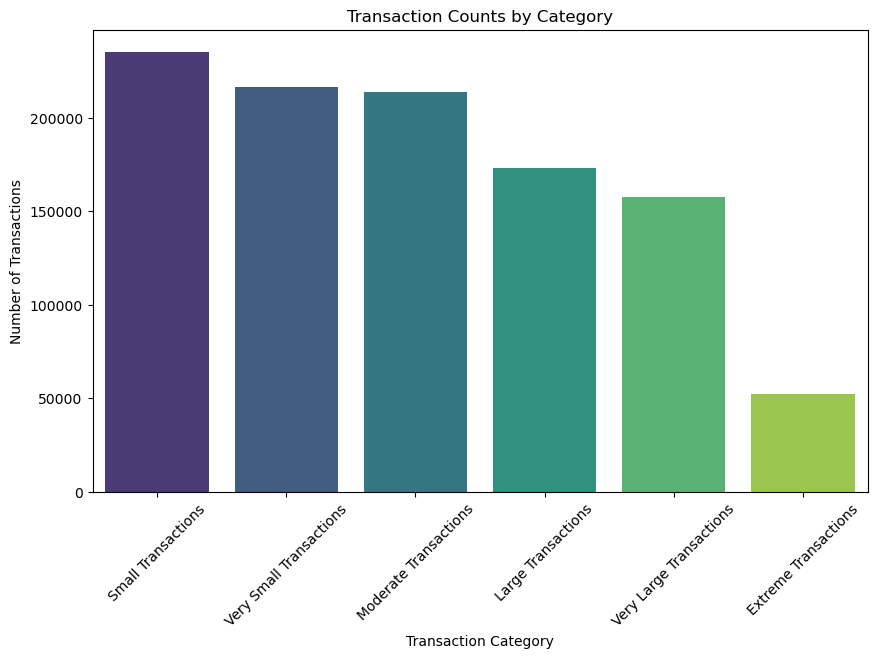

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

#Creating a new column for the transaction category
df['transaction_category'] = df['monopoly_money_amount'].apply(categorize_amount)

#Bar Plot for Transaction Counts by Category
plt.figure(figsize=(10, 6))
transaction_counts = df['transaction_category'].value_counts()
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='viridis')
plt.title('Transaction Counts by Category')
plt.xlabel('Transaction Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [14]:
#Defining keywords for each transaction type
transaction_types = {
    'Cafe': ['coffee', 'cafe', 'espresso', 'bakery'],
    'Pub': ['pub', 'bar', 'drinks', 'beer', 'cocktail'],
    'Shopping': ['department store', 'electronics', 'fashion', 'store', 'trainer', 'clothes', 'tech', 'DVD', 'children', 'toy', 'videogame', 'board', 'action', 'DIY', 'cook', 'jewellery', 'accessory', 'clothing'],
    'Bookshop': ['comic', 'book', 'nerdy', 'bookshop'],
    'Cinema': ['cinema'],
    'Restaurant': ['restaurant', 'kebab', 'lunch', 'curry', 'takeaway'],
    'Supermarket': ['supermarket', 'butchers', 'greengrocer']
}

#Function to label transactions based on keywords
def label_transactions(to_randomly_generated_account
):
    for transaction_type, keywords in transaction_types.items():
        for keyword in keywords:
            if keyword in to_randomly_generated_account.lower():
                return transaction_type
    return 'Other'  # If none of the keywords match, label as 'Other'

#Creating a new column 'transaction_type' based on the description
df['transaction_type'] = df['to_randomly_generated_account'].apply(label_transactions)

#Updated DataFrame
print(df)


         from_totally_fake_account  monopoly_money_amount  \
0                            10371                   4.00   
1                            88339                   2.40   
2                            18555                   2.40   
3                            18555                   4.10   
4                            80792                   1.95   
...                            ...                    ...   
1048570                       9869                  44.69   
1048571                       9869                   2.25   
1048572                       9869                   2.40   
1048573                       9869                   2.25   
1048574                      37671                 187.00   

        to_randomly_generated_account not_happened_yet_date  \
0                              CINEMA            01/01/2025   
1                               40544            01/01/2025   
2                               85149            01/01/2025   
3              

In [15]:
#Categories and their corresponding keywords
categories = {
    'Cafe': ['coffee', 'cafe', 'espresso', 'bakery'],
    'Pub': ['pub', 'bar', 'drinks', 'beer', 'cocktail'],
    'Shopping': ['department store', 'electronics', 'fashion', 'store', 'trainer', 'clothes', 'tech', 'DVD', 'children', 'toy', 'videogame', 'board', 'action', 'DIY', 'cook', 'jewellery', 'accessory', 'clothing'],
    'Bookshop': ['comic', 'book', 'nerdy', 'bookshop'],
    'Cinema': ['cinema'],
    'Restaurant': ['restaurant', 'kebab', 'lunch', 'curry', 'takeaway'],
    'Supermarket': ['supermarket', 'butchers', 'greengrocer']
}

#Initializing a dictionary to store variance for each category
category_variances = {}

#Iterating through each category and calculate variance
for category, keywords in categories.items():
    category_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(keywords), case=False, na=False)]
    category_variances[category] = category_transactions['monopoly_money_amount'].var()

#Variance for each category
print("Variance for Each Category:")
for category, variance in category_variances.items():
    print(f"{category}: {variance}")

Variance for Each Category:
Cafe: 0.6580198070089686
Pub: 55.08344961524975
Shopping: 2722.2844104307546
Bookshop: 29.381720162063164
Cinema: 4.318271755070196
Restaurant: 318.8790700372786
Supermarket: 1881.4742182698585


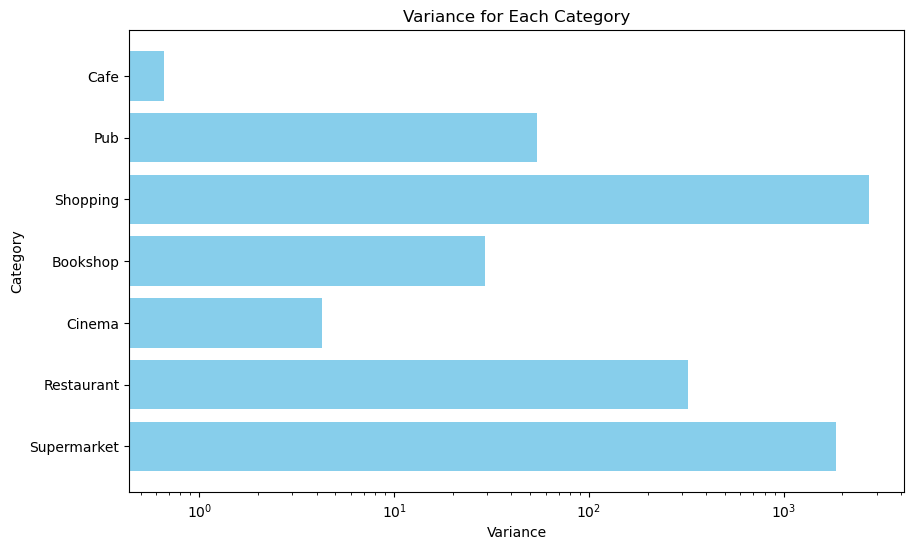

In [16]:
categories = ['Cafe', 'Pub', 'Shopping', 'Bookshop', 'Cinema', 'Restaurant', 'Supermarket']
variances = [0.6617157213391082, 54.417789595832865, 2740.0838573071296, 29.173211611485055, 4.263330753984142, 321.5979362858781, 1855.132980485769]

plt.figure(figsize=(10, 6))
plt.barh(categories, variances, color='skyblue')
plt.xlabel('Variance')
plt.ylabel('Category')
plt.title('Variance for Each Category')
plt.gca().invert_yaxis()  
plt.xscale('log')  
plt.show()

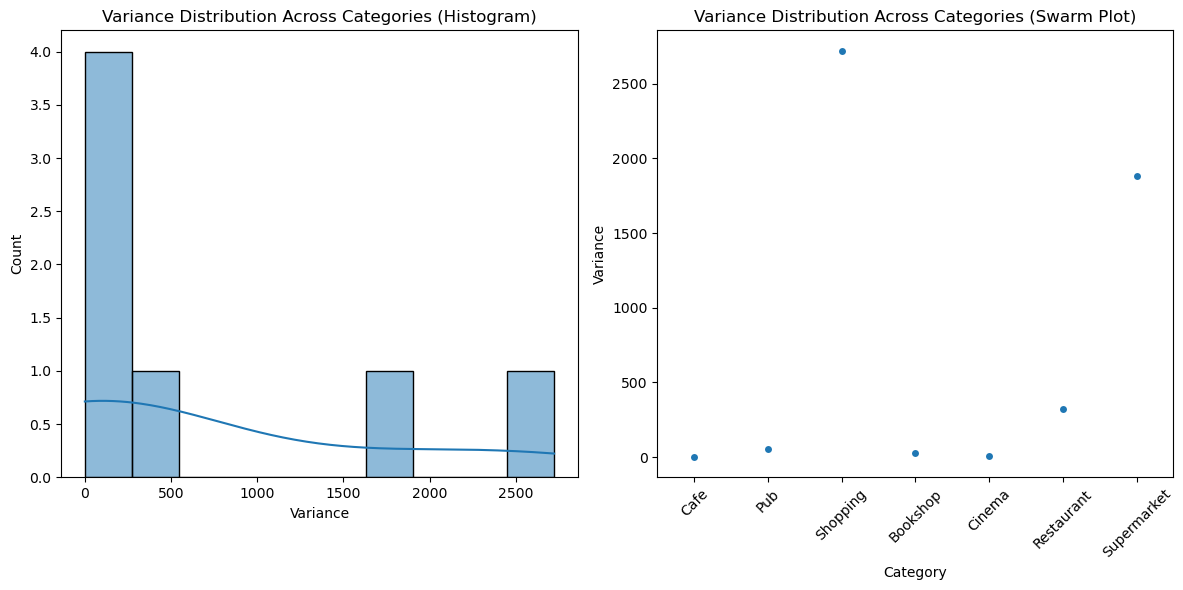

In [17]:
#Converting the dictionary to a DataFrame 
variance_df = pd.DataFrame.from_dict(category_variances, orient='index', columns=['Variance'])

#Index to get categories as a column
variance_df.reset_index(inplace=True)
variance_df.rename(columns={'index': 'Category'}, inplace=True)

#Histogram 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=variance_df, x='Variance', bins=10, kde=True)
plt.title('Variance Distribution Across Categories (Histogram)')


#Swarm Plot
plt.subplot(1, 2, 2)
sns.swarmplot(data=variance_df, x='Category', y='Variance')
plt.title('Variance Distribution Across Categories (Swarm Plot)')
plt.xticks(rotation=45)
plt.ylabel('Variance')

plt.tight_layout()
plt.show()


In [18]:
#Average spends for each category
average_spends = df.groupby('transaction_category')['monopoly_money_amount'].mean()
print("Average Spends for Each Category:")
print(average_spends)


Average Spends for Each Category:
transaction_category
Extreme Transactions       204.679426
Large Transactions          11.077300
Moderate Transactions        6.820790
Small Transactions           3.937200
Very Large Transactions     22.576363
Very Small Transactions      2.072848
Name: monopoly_money_amount, dtype: float64


In [19]:
df

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,transaction_category,transaction_type
0,10371,4.00,CINEMA,01/01/2025,Small Transactions,Cinema
1,88339,2.40,40544,01/01/2025,Very Small Transactions,Other
2,18555,2.40,85149,01/01/2025,Very Small Transactions,Other
3,18555,4.10,HIPSTER_COFFEE_SHOP,01/01/2025,Small Transactions,Cafe
4,80792,1.95,18555,01/01/2025,Very Small Transactions,Other
...,...,...,...,...,...,...
1048570,9869,44.69,TAKEAWAY,07/02/2025,Very Large Transactions,Restaurant
1048571,9869,2.25,TOTALLY_A_REAL_COFFEE_SHOP,07/02/2025,Very Small Transactions,Cafe
1048572,9869,2.40,A_CAFE,07/02/2025,Very Small Transactions,Cafe
1048573,9869,2.25,A_LOCAL_COFFEE_SHOP,07/02/2025,Very Small Transactions,Cafe


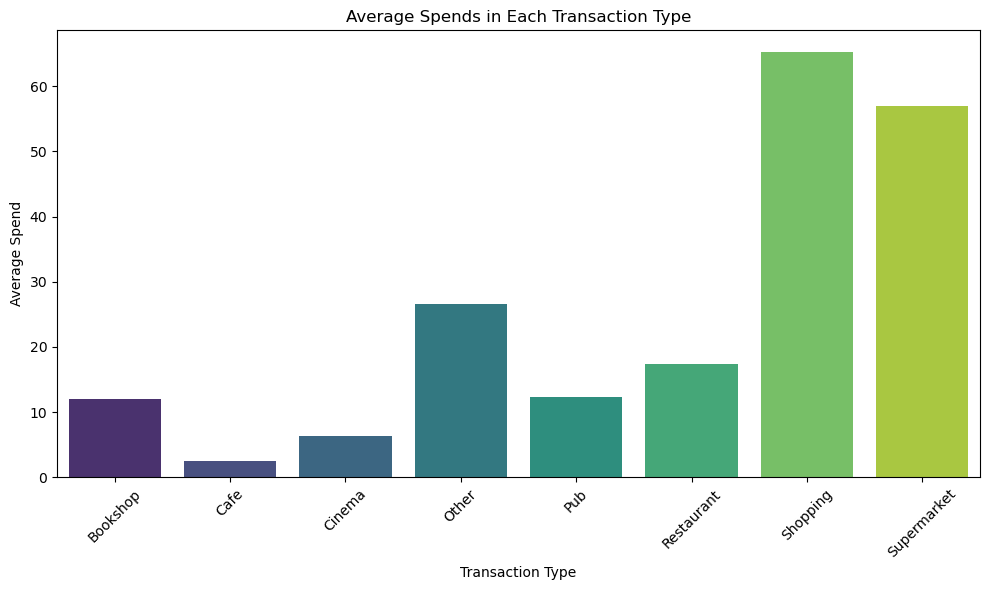

In [20]:
#Grouping the DataFrame by 'transaction_type' and calculating the average spend for each type
average_spends = df.groupby('transaction_type')['monopoly_money_amount'].mean().reset_index()

#Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=average_spends, x='transaction_type', y='monopoly_money_amount', palette='viridis')
plt.title('Average Spends in Each Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Spend')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

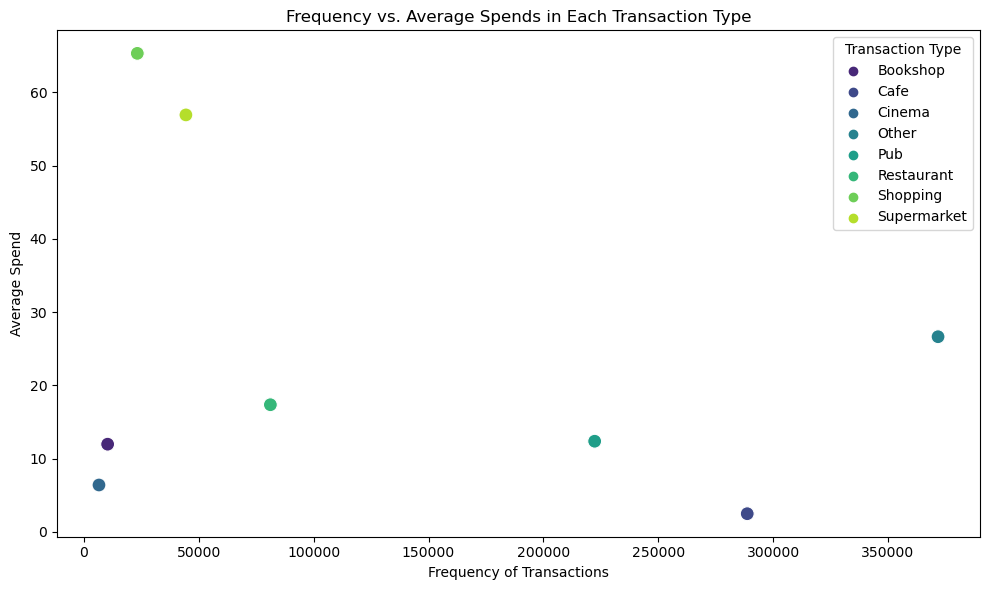

In [21]:
#Grouping the DataFrame by 'transaction_type' and calculate both the frequency and average spend for each type
type_stats = df.groupby('transaction_type').agg({'monopoly_money_amount': 'mean', 'transaction_type': 'size'}).rename(columns={'transaction_type': 'frequency'}).reset_index()

#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=type_stats, x='frequency', y='monopoly_money_amount', hue='transaction_type', palette='viridis', s=100)
plt.title('Frequency vs. Average Spends in Each Transaction Type')
plt.xlabel('Frequency of Transactions')
plt.ylabel('Average Spend')
plt.legend(title='Transaction Type', loc='upper right')
plt.tight_layout()
plt.show()

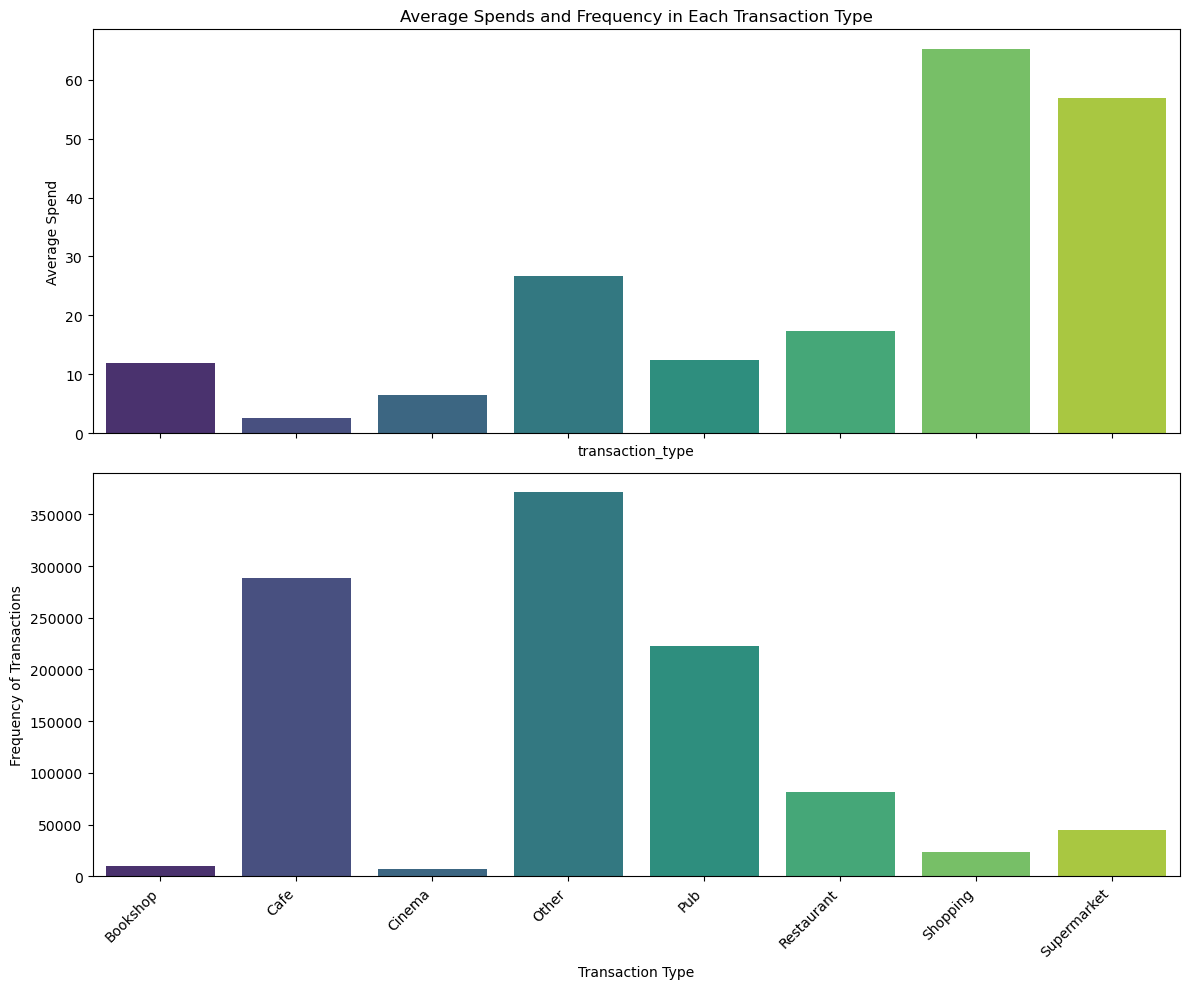

In [22]:
#Grouping the DataFrame by 'transaction_type' and calculating both the frequency and average spend for each type
type_stats = df.groupby('transaction_type').agg({'monopoly_money_amount': 'mean', 'transaction_type': 'size'}).rename(columns={'transaction_type': 'frequency'}).reset_index()

#Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

#Plotting average spends
sns.barplot(data=type_stats, x='transaction_type', y='monopoly_money_amount', palette='viridis', ax=ax1)
ax1.set_title('Average Spends and Frequency in Each Transaction Type')
ax1.set_ylabel('Average Spend')

#Plotting frequency
sns.barplot(data=type_stats, x='transaction_type', y='frequency', palette='viridis', ax=ax2)
ax2.set_ylabel('Frequency of Transactions')
ax2.set_xlabel('Transaction Type')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

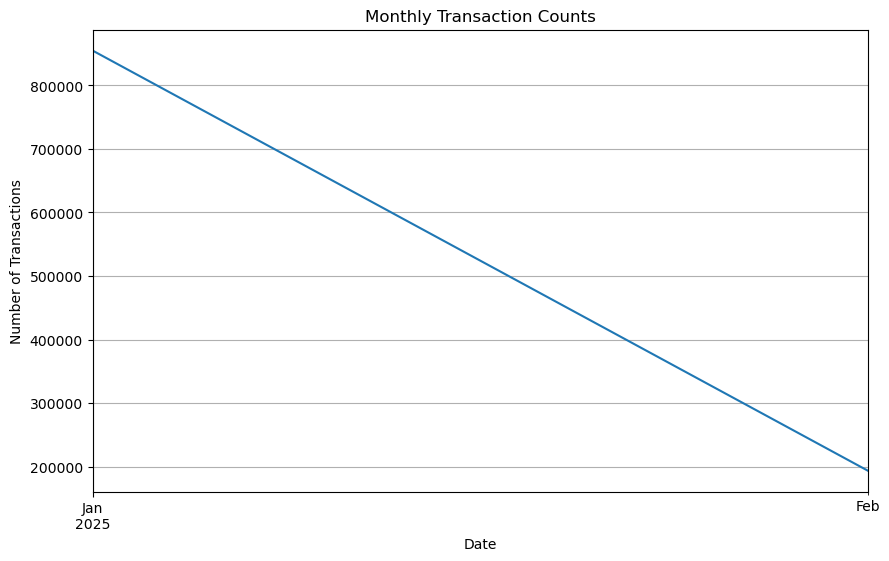

In [23]:
#Converting the date column to datetime format
df['not_happened_yet_date'] = pd.to_datetime(df['not_happened_yet_date'], format='%d/%m/%Y')

#Date column as the index
df.set_index('not_happened_yet_date', inplace=True)

#Performing time series analysis on the distribution of transactions over time
#Transaction volumes over months
monthly_transaction_counts = df.resample('M').size()

#Monthly transaction counts
plt.figure(figsize=(10, 6))
monthly_transaction_counts.plot()
plt.title('Monthly Transaction Counts')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

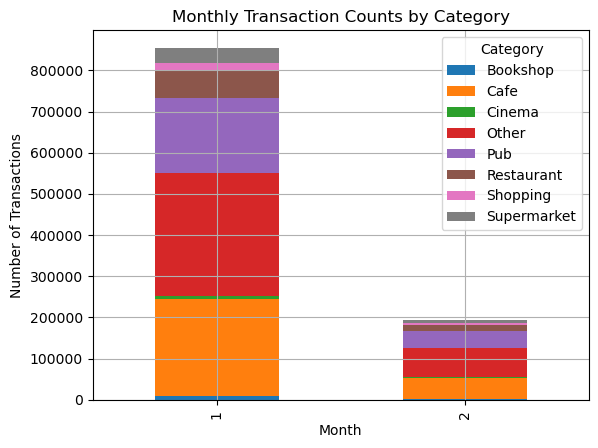

In [24]:
#Monthly transaction counts by category
monthly_category_counts = df.pivot_table(index=df.index.month, columns='transaction_type', aggfunc='size', fill_value=0)

#Plotting monthly transaction counts by category
plt.figure(figsize=(10, 6))
monthly_category_counts.plot(kind='bar', stacked=True)
plt.title('Monthly Transaction Counts by Category')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Category')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

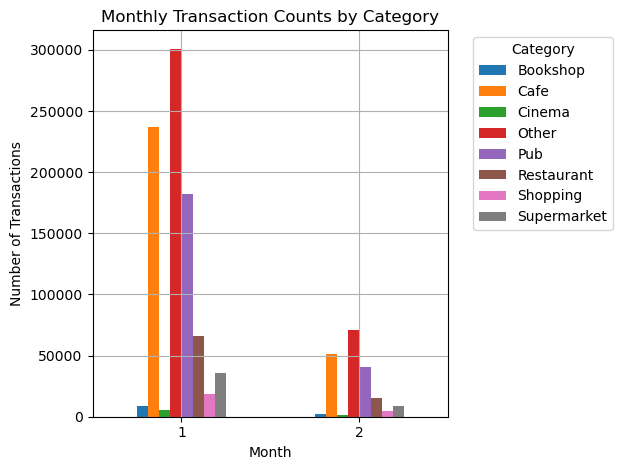

In [25]:
#Grouped bar chart
plt.figure(figsize=(12, 8))
monthly_category_counts.plot(kind='bar', stacked=False)
plt.title('Monthly Transaction Counts by Category')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  
plt.grid(True)
plt.tight_layout()
plt.show()

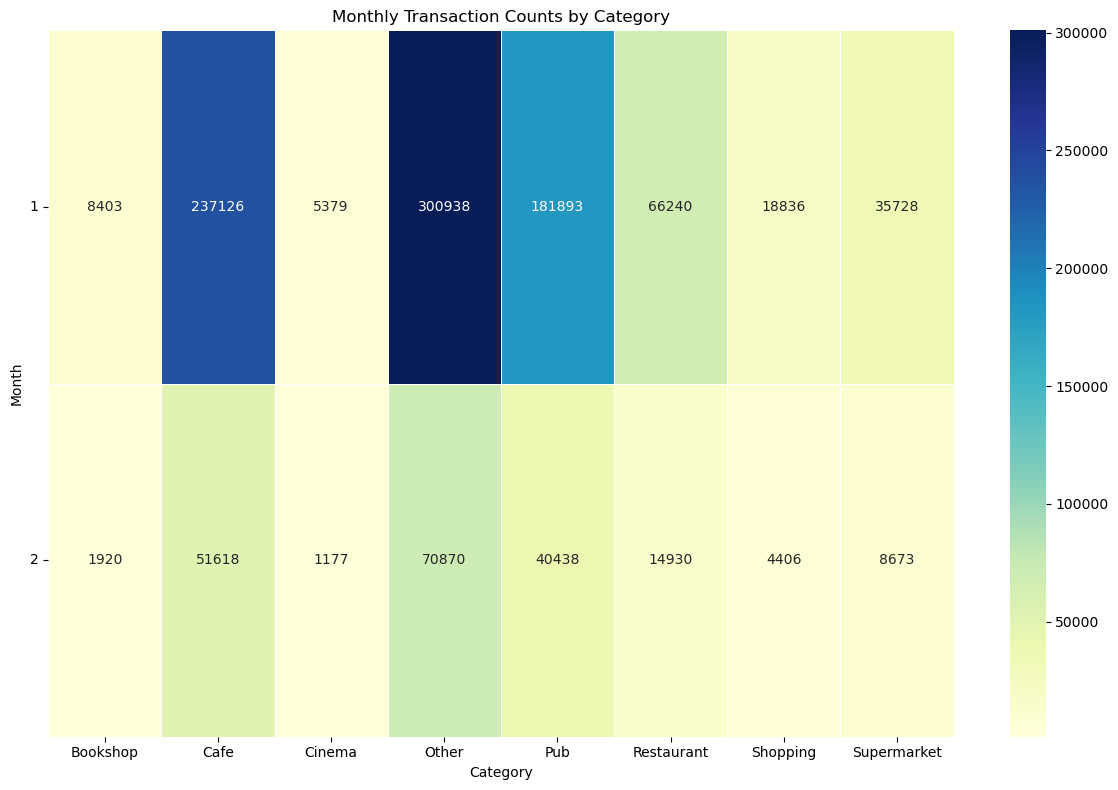

In [26]:
#Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_category_counts, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Monthly Transaction Counts by Category')
plt.xlabel('Category')
plt.ylabel('Month')
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()

RFM Analysis

In [34]:
dataset_path = '/Users/hutiancheng/Desktop/dataset.csv'
data = pd.read_csv(dataset_path)
data.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371,4.00,CINEMA,01/01/2025
1,88339,2.40,40544,01/01/2025
2,18555,2.40,85149,01/01/2025
3,18555,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792,1.95,18555,01/01/2025


In [35]:
import numpy as np

# Seed for reproducibility
np.random.seed(0)

# Generate random dates within the past 2 years
random_dates = pd.date_range(start='2021-01-01', periods=100, freq='D').to_series()
random_dates = random_dates.sample(n=len(data), replace=True).reset_index(drop=True).dt.strftime('%d/%m/%Y')

# Replace the unrealistic future dates with these random past dates
data['not_happened_yet_date'] = random_dates

data.head()


,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371,4.00,CINEMA,14/02/2021
1,88339,2.40,40544,17/02/2021
2,18555,2.40,85149,06/03/2021
3,18555,4.10,HIPSTER_COFFEE_SHOP,09/03/2021
4,80792,1.95,18555,09/03/2021


In [36]:
from datetime import datetime

# Convert date strings to datetime objects
data['not_happened_yet_date'] = pd.to_datetime(data['not_happened_yet_date'], format='%d/%m/%Y')

# Define a reference date which is one day after the last transaction date in the dataset
reference_date = data['not_happened_yet_date'].max() + pd.Timedelta(days=1)

# Calculate Recency, Frequency, Monetary
rfm = data.groupby('from_totally_fake_account').agg({
    'not_happened_yet_date': lambda x: (reference_date - x.max()).days,  # Recency: days since last transaction
    'monopoly_money_amount': ['count', 'sum']  # Frequency and Monetary
}).reset_index()

# Rename columns for clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Show the first few rows of the RFM table
rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,1000,1,181,2824.34
1,1002,2,103,1725.04
2,1006,1,173,1981.66
3,1018,6,90,1428.19
4,1053,1,115,1935.12


In [37]:
# Calculate quartiles for each metric
quantiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

# Function to assign scores based on quartiles
def rfm_score(x, metric, quantiles):
    if metric == 'Recency':
        if x <= quantiles[metric][0.25]:
            return 1
        elif x <= quantiles[metric][0.50]:
            return 2
        elif x <= quantiles[metric][0.75]:
            return 3
        else:
            return 4
    else:
        if x <= quantiles[metric][0.25]:
            return 4
        elif x <= quantiles[metric][0.50]:
            return 3
        elif x <= quantiles[metric][0.75]:
            return 2
        else:
            return 1

# Apply scoring functions
rfm['R_Score'] = rfm['Recency'].apply(rfm_score, args=('Recency', quantiles))
rfm['F_Score'] = rfm['Frequency'].apply(rfm_score, args=('Frequency', quantiles))
rfm['M_Score'] = rfm['Monetary'].apply(rfm_score, args=('Monetary', quantiles))

# Combine RFM scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Show the updated RFM table with scores
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1000,1,181,2824.34,1,1,1,111
1,1002,2,103,1725.04,3,3,4,334
2,1006,1,173,1981.66,1,1,3,113
3,1018,6,90,1428.19,4,4,4,444
4,1053,1,115,1935.12,1,3,3,133


In [41]:
# Define the segmentation function
def segment_customer(df):
    if df['R_Score'] == 1 and df['F_Score'] <= 3 and df['M_Score'] <= 3:
        return 'High values'
    elif df['R_Score'] <= 3 and (df['F_Score'] == 2 or df['F_Score'] == 3):
        return 'Loyal Customers'
    elif df['R_Score'] <= 2 and df['F_Score'] == 1:
        return 'Potential Loyalists'
    elif df['R_Score'] == 1:
        return 'Recent Customers'
    elif df['R_Score'] == 3 and df['F_Score'] == 1 and df['M_Score'] == 1:
        return 'At Risk'
    elif df['R_Score'] == 4 and df['F_Score'] == 1:
        return 'Can’t Lose Them'
    elif df['R_Score'] >= 3 and df['F_Score'] >= 3 and df['M_Score'] >= 3:
        return 'Hibernating'
    else:
        return 'Need Attention'

# Apply the segmentation function
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Show the distribution of segments
rfm['Segment'].value_counts()


High values            3624
Loyal Customers        1508
Recent Customers       1247
Need Attention          776
Hibernating             631
Potential Loyalists     216
At Risk                  80
Can’t Lose Them          60
Name: Segment, dtype: int64

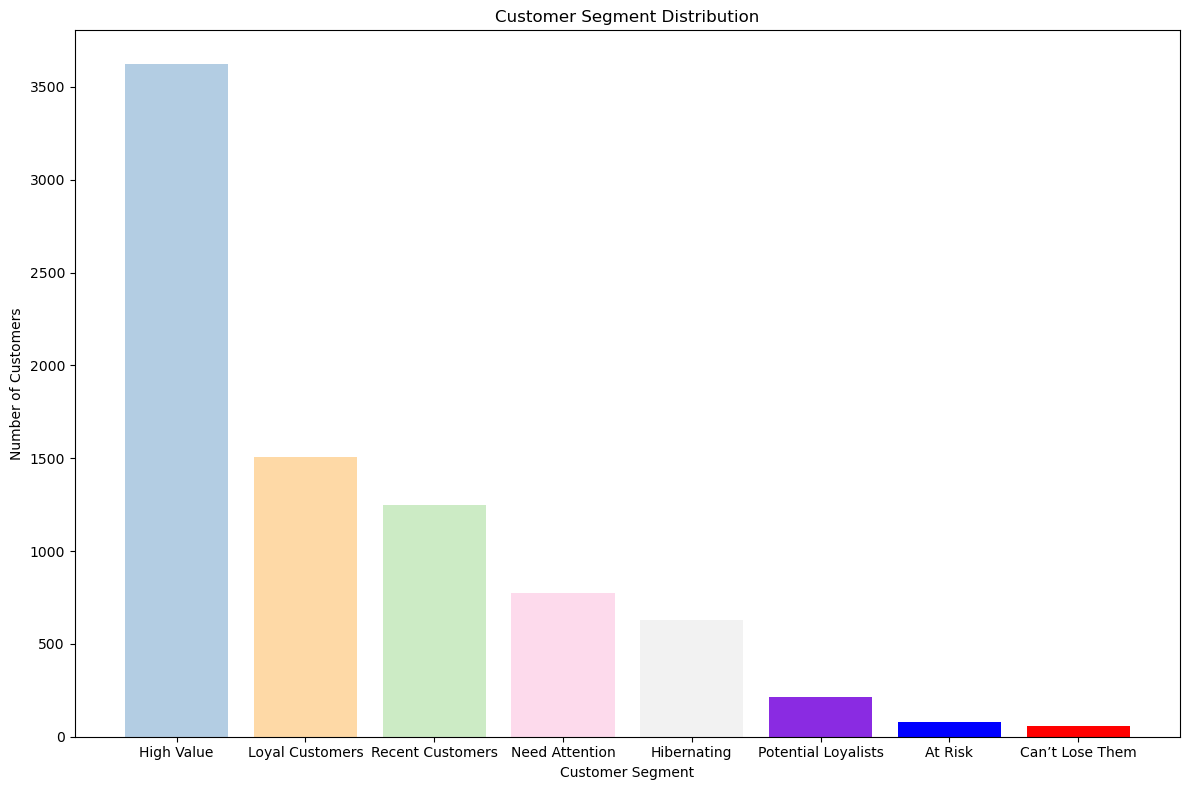

In [47]:
customer_segments = ['High Value','Loyal Customers', 'Recent Customers', 'Need Attention', 'Hibernating', 'Potential Loyalists', 'At Risk', 'Can’t Lose Them']
counts = [3624,1508,1247,776,631,216,80,60]

plt.figure(figsize=(12,8))
plt.bar(customer_segments, counts, color=['#B3CDE3', '#FED9A6', '#CCEBC5', '#FDDAEC', '#F2F2F2','#8A2BE2','#0000FF','#FF0000'])
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()  
plt.show()

K-means clustering

In [ ]:
data.head(), data.dtypes

(   from_totally_fake_account  monopoly_money_amount  \
 0                      10371                   4.00   
 1                      88339                   2.40   
 2                      18555                   2.40   
 3                      18555                   4.10   
 4                      80792                   1.95   
 
   to_randomly_generated_account not_happened_yet_date  
 0                        CINEMA            2021-02-14  
 1                         40544            2021-02-17  
 2                         85149            2021-03-06  
 3           HIPSTER_COFFEE_SHOP            2021-03-09  
 4                         18555            2021-03-09  ,
 from_totally_fake_account                 int64
 monopoly_money_amount                   float64
 to_randomly_generated_account            object
 not_happened_yet_date            datetime64[ns]
 dtype: object)

/Users/hutiancheng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hutiancheng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hutiancheng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


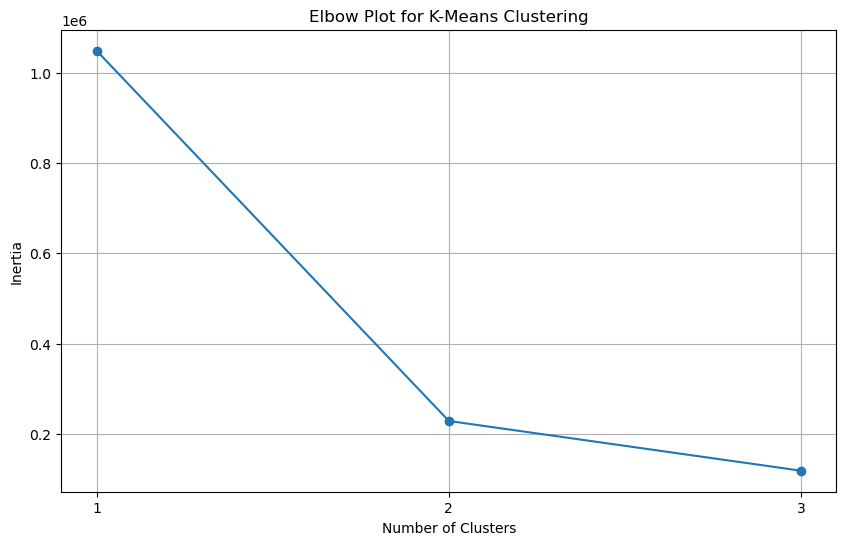

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Extract the relevant column
monopoly_amounts = data[['monopoly_money_amount']]

# Normalize the data
scaler = StandardScaler()
monopoly_amounts_scaled = scaler.fit_transform(monopoly_amounts)

# Applying K-means clustering with a range of clusters to create an elbow plot
inertia = []
K_range = range(1,4)  # Trying from 1 to 3 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(monopoly_amounts_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.show()


Accurate the clustering

In [ ]:
# Correctly defining the monopoly_money variable
monopoly_money = data[['monopoly_money_amount']].values

# Running K-means clustering with 3 clusters
kmeans_correct = KMeans(n_clusters=3, random_state=0).fit(monopoly_money)
data['Cluster'] = kmeans_correct.labels_

# Calculating cluster centroids and the count of data points per cluster
centroids_correct = kmeans_correct.cluster_centers_
cluster_counts_correct = data['Cluster'].value_counts().sort_index()

centroids_correct, cluster_counts_correct


/Users/hutiancheng/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([[ 447.50358154],
        [1469.99362245],
        [  11.83854314]]),
 0       5936
 1       2744
 2    1039895
 Name: Cluster, dtype: int64)